In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [8]:
df = pd.read_csv("C:\\Users\\saiei\\OneDrive\\Desktop\\Applied Stats\\Loan Prediction Data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
# Encoding all categorical data

# Loan Status Encoding
df['Loan_Status'] = df['Loan_Status'].replace({'Y': 1, 'N': 0})

# Gender Encoding
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

# Married Encoding
df['Married'] = df['Married'].replace({'Yes': 1, 'No': 0})

# Replace the 3+ in dependents and make the column numeric
df['Dependents'] = df['Dependents'].replace('3+', '3')
df['Dependents']=pd.to_numeric(df['Dependents'], errors='coerce')

# Self Employed Encoding
df['Self_Employed'] = df['Self_Employed'].replace({'Yes': 1, 'No': 0})

# Education Encoding
df['Education'] = df['Education'].replace({'Graduate': 1, 'Not Graduate': 0})

# Drop the Loan ID column
df = df.drop(columns=['Loan_ID'])

# Property Area Encoding
df['Property_Area'] = df['Property_Area'].replace({'Rural': 0, 'Urban': 1, 'Semiurban': 2})

df.head

<bound method NDFrame.head of      Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1.0      0.0         0.0          1            0.0             5849   
1       1.0      1.0         1.0          1            0.0             4583   
2       1.0      1.0         0.0          1            1.0             3000   
3       1.0      1.0         0.0          0            0.0             2583   
4       1.0      0.0         0.0          1            0.0             6000   
..      ...      ...         ...        ...            ...              ...   
609     0.0      0.0         0.0          1            0.0             2900   
610     1.0      1.0         3.0          1            0.0             4106   
611     1.0      1.0         1.0          1            0.0             8072   
612     1.0      1.0         2.0          1            0.0             7583   
613     0.0      0.0         0.0          1            1.0             4583   

     CoapplicantIncom

In [110]:
# Cleaning the data

df.fillna(df.median(), inplace=True)
columns = df.columns
for column in columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [111]:
for column in df.columns:
    print(f"Valores Nulos en {column}: {df[column].isnull().sum()}")

Valores Nulos en Gender: 0
Valores Nulos en Married: 0
Valores Nulos en Dependents: 0
Valores Nulos en Education: 0
Valores Nulos en Self_Employed: 0
Valores Nulos en ApplicantIncome: 0
Valores Nulos en CoapplicantIncome: 0
Valores Nulos en LoanAmount: 0
Valores Nulos en Loan_Amount_Term: 0
Valores Nulos en Credit_History: 0
Valores Nulos en Property_Area: 0
Valores Nulos en Loan_Status: 0


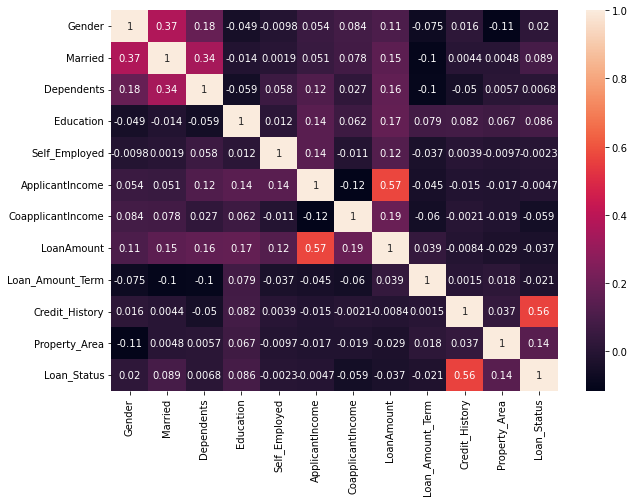

In [13]:
# Correlation through heatmap

fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(df.corr(),annot=True)
plt.show()

##### From the heatmap we can see the correlation of all the variables with respect to the Loan Status which is our dependent variable, and we can see that most variables have a null correlation with the dependent variable and thus not relevant data for our prediction. 
##### Hence, we will work with only those variables with an absolute value of the correlation is greater than a certain level defined by each one. In our case, it is 0.05 to get at least 3 variables for our model.

In [112]:
def correlationdrop(df, sl):
    columns = df.columns
    for column in columns:
        C = abs(df[column].corr(df['Loan_Status']))
        if C < sl:
            df = df.drop(columns=[column])
    return df

df = correlationdrop(df, 0.05)

print(df)

     Married  Education  CoapplicantIncome  Credit_History  Property_Area  \
0        0.0          1                0.0             1.0              1   
1        1.0          1             1508.0             1.0              0   
2        1.0          1                0.0             1.0              1   
3        1.0          0             2358.0             1.0              1   
4        0.0          1                0.0             1.0              1   
..       ...        ...                ...             ...            ...   
609      0.0          1                0.0             1.0              0   
610      1.0          1                0.0             1.0              0   
611      1.0          1              240.0             1.0              1   
612      1.0          1                0.0             1.0              1   
613      0.0          1                0.0             0.0              2   

     Loan_Status  
0              1  
1              0  
2              1  

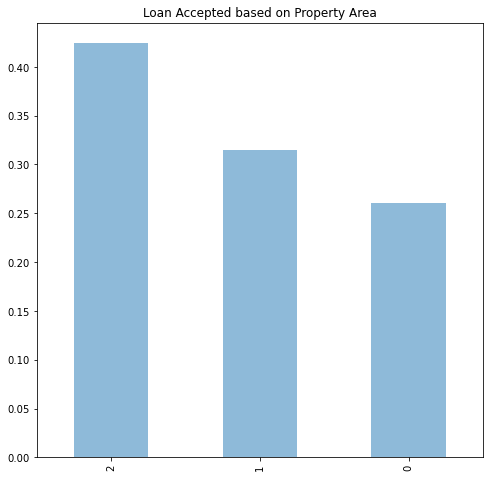

In [15]:
# Data Visualization

fig, ax = plt.subplots(figsize=(8, 8))
df.Property_Area[df.Loan_Status==1].value_counts(normalize = True).plot(kind='bar', alpha = 0.5)
plt.title('Loan Accepted based on Property Area')
plt.show()

#### 2 - SemiUrban, 1 - Urban, 2 - Rural.

##### We can observe that Semiurban has the highest tendency of loan approval. 

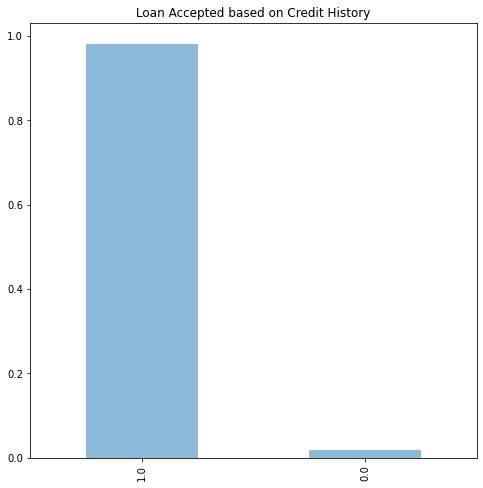

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))
df.Credit_History[df.Loan_Status==1].value_counts(normalize = True).plot(kind='bar', alpha = 0.5)
plt.title('Loan Accepted based on Credit History')
plt.show()

##### Credit history plays a vital role in loan approval.

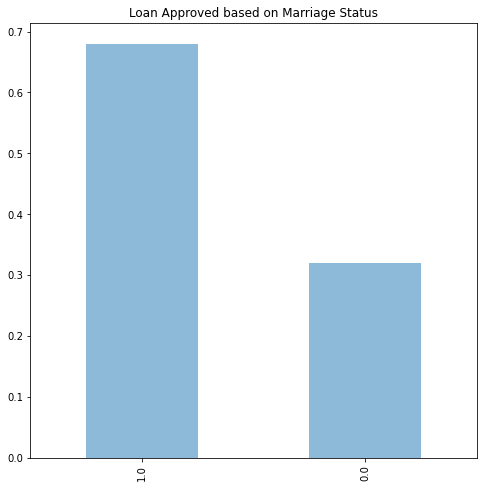

In [22]:
fig, ax = plt.subplots(figsize=(8, 8))

df.Married[df.Loan_Status==1].value_counts(normalize = True).plot(kind='bar', alpha = 0.5)
plt.title('Loan Approved based on Marriage Status')
plt.show()

##### There is a positive correlation between marriage status and loan approvals.

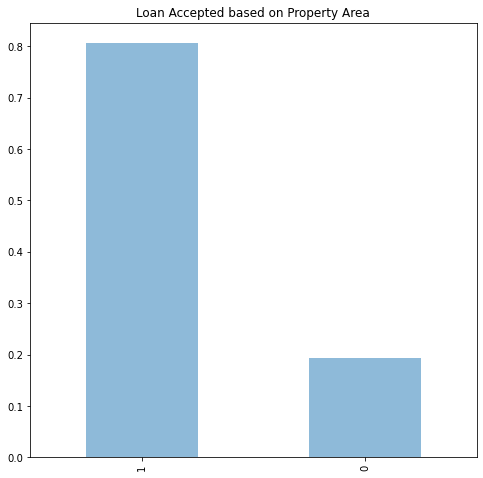

In [27]:
fig, ax = plt.subplots(figsize=(8, 8))
df.Education[df.Loan_Status==1].value_counts(normalize = True).plot(kind='bar', alpha = 0.5)
plt.title('Loan Accepted based on Property Area')
plt.show()

In [128]:
# Train & Test the data


X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Predictions on the testing set
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.7560975609756098


##### The accuracy score obtained from applying the Random Forest classifier on the loan prediction data indicates the proportion of correctly classified instances in the testing set. An accuracy score of, 0.76 means that 76% of the instances in the testing set were correctly classified by the classifier.

In [129]:
# Fit the logistic regression model
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.519946
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                          Logit   Df Residuals:                      609
Method:                           MLE   Df Model:                            4
Date:                Wed, 22 Mar 2023   Pseudo R-squ.:                  0.1631
Time:                        14:21:02   Log-Likelihood:                -319.25
converged:                       True   LL-Null:                       -381.45
Covariance Type:            nonrobust   LLR p-value:                 6.138e-26
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Married              -0.1480      0.193     -0.768      0.443      -0.526       0.230
Education            -0.6823      0.226     -3.017      0.003      -1.125      -0.239
CoapplicantIncome -8.083e-05   3.39e-05     -2.384      0.017      -0.000   -1.44e-05
Credit_History        2.0701      0.227      9.116      0.000       1.625       2.515
Property_Area         0.0604      0.114      0.530      0.596      -0.163       0.284
=====================================================================================
"""